## Pytesseract

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,804 kB/s)
debconf: unable to initi

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import cv2
from sklearn.cluster import AgglomerativeClustering
from tabulate import tabulate
from google.colab.patches import cv2_imshow
from PIL import Image

print(f"OpenCV version: {cv2.__version__}")

OpenCV version: 4.6.0


In [2]:
test_img = 'Rentals.ca_-_Rent_Report_-_January_2019.width-720-483x1024.png'
test_img_high_res = "Rent_Report_-_June_2019.width-720.png"

In [3]:
def preprocess(image,
               resize = False,
               preserve_ar = False,
               grayscale = False,
               gaussian_blur = False,
               thresholding = False,
               thresh_value = 127,
               verbose = True):
  '''
  Preprocess image object input with:
  image: image input file path;
  resize: Resize to desired width and height dimensions. Takes arguments tuple
    (width, height), single Integer as target width or false boolean. Will
    inforce aspect ratio based on passed target width if preserve_ar argument is
    set to True. Default = False. Default = True if resize argument is integer;
  preserve_ar: Boolean argument to preserve original image's Aspect Ratio or
    redefine based on 'resize' input. Default = True;
  grayscale: OpenCV grayscaling. Takes argument boolean = True or False.
    Default = False;
  gaussian_blur: Smooth image input with a gaussian blurring method. Takes
    arguments Integer kernel size or false boolean. Default = False;
  thresholding: OpenCV simple thresholding. Takes arguments [binary, binary_inv]
    or false boolean. Default = False;
  thresh_value: OpenCV threshold value. Takes argument Int. Default = 127;
  '''
  # Image load and input dimensions
  input_file = image
  image = cv2.imread(image)
  input_height = int(image.shape[0])
  input_width = int(image.shape[1])
  aspect_ratio = input_height/input_width
  
  if verbose:
    print(f"Processing input file: {input_file}...")

  # Resizing
  if type(resize) == int:
    resize = (resize,)
    preserve_ar = True

  if resize:
    if preserve_ar:
      image = cv2.resize(image, (resize[0], int(resize[0]*aspect_ratio)))
    else:
      image = cv2.resize(image, resize)
  
  output_height = int(image.shape[0])
  output_width = int(image.shape[1])

  # Gray-scaling
  if grayscale:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Blurring
  if gaussian_blur:
    image = cv2.GaussianBlur(image, (5, 5), gaussian_blur)

  # Thresholding
  if thresholding:
    if thresholding == "binary":
      image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY_INV)[1]
    elif thresholding == "binary_inv":
      image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY_INV)[1]
    else:
      print("Invalid thresholding argument!")
  
  if verbose:
    print(f"Image input dimensions: {(input_width, input_height)}\n"\
          f"Image output dimensions: {(output_width, output_height)}\n")
  return image

Processing input file: Rentals.ca_-_Rent_Report_-_January_2019.width-720-483x1024.png...
Image input dimensions: (483, 1024)
Image output dimensions: (1000, 2120)



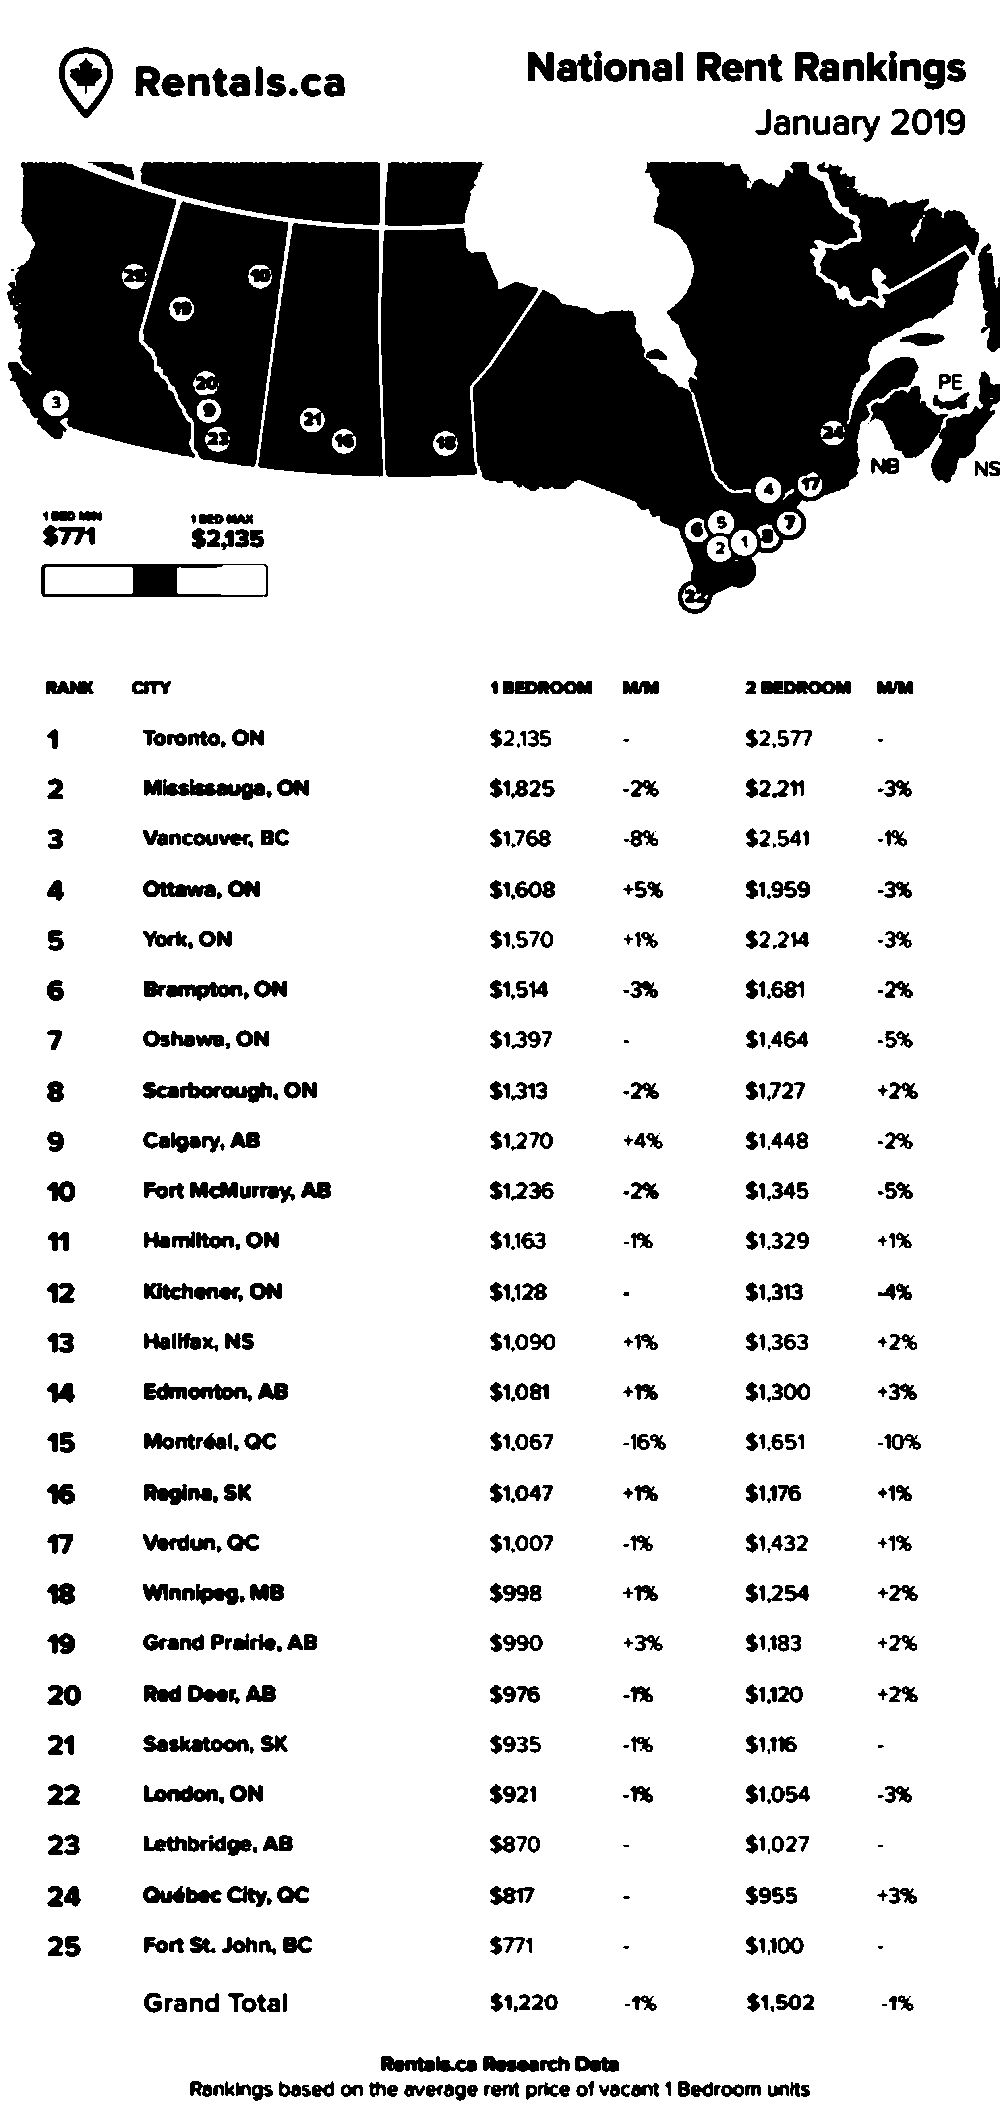

In [155]:
preprocessed_test_img = (preprocess(test_img,
                          resize = 1000,
                          grayscale = True,
                          gaussian_blur = 0,
                          thresholding = "binary",
                          thresh_value = 160))
cv2_imshow(preprocessed_test_img)

In [156]:
print(pytesseract.image_to_string(preprocessed_test_img, lang = 'eng'))

® Rentals.ca National Rent Rankings

ci

January 2019

   

1000 sane
$7™ $2135
a

RANK cry 1BEDROOM MM 2BEDROOM MM
1 Toronto, ON $2,135 - $2,577

2 Missiasauge, ON $1,825 -2% $2.21 “3%
3 Vancouver, BC $1,768 8% $2,541 “1%
4 Ottawa, ON $1,608 +5% $1,959 -3%
5 York, ON $1,570 +1% $2,214 “3%
6 Brampton, ON $1,514 3% $1.681 “2%
7 Oshawa, ON $1397 - $1,464 -5%
8 Scarborough, ON $1313 -2% $1727 +2%
9 Calgary, AB $1,270 +4% $1448 -%
70 Fort McMurray, AB $1236 +2% $1,345 5%
n Hamilton, ON $1163 -% $1,329 +1%
12 Kitchener, ON $1128 : $1,313 4%
23 Halifax, NS $1,090 +1% $1,363 +2%
" Edmonton, AB $1,081 41% $1,300 +3%
15 Montréal, OC $1.067 16% $1,651 10%
6 Regina, SK $1.047 4% $1176 +1%
7 Verdun, GC $1,007 1% $1,432 +1%
eB Winnipeg, MB $998 41% $1,254 +2%
99 Grand Prairte, AB $990 +3% $1183 +2%
20 Red Deer, AB $976 -t% $1120 +2%
21 Saskatoon, SK $935 -% $1.16 -
22 London, ON $921 -% $1,054 -3%
23 Lethbridge, AB $870 - $1,027

24 Québec City, OC $37 - $955 +3%
25 Fort St. John, BC $771 : $1100



Processing input file: Rent_Report_-_June_2019.width-720.png...
Image input dimensions: (720, 1862)
Image output dimensions: (1100, 2844)



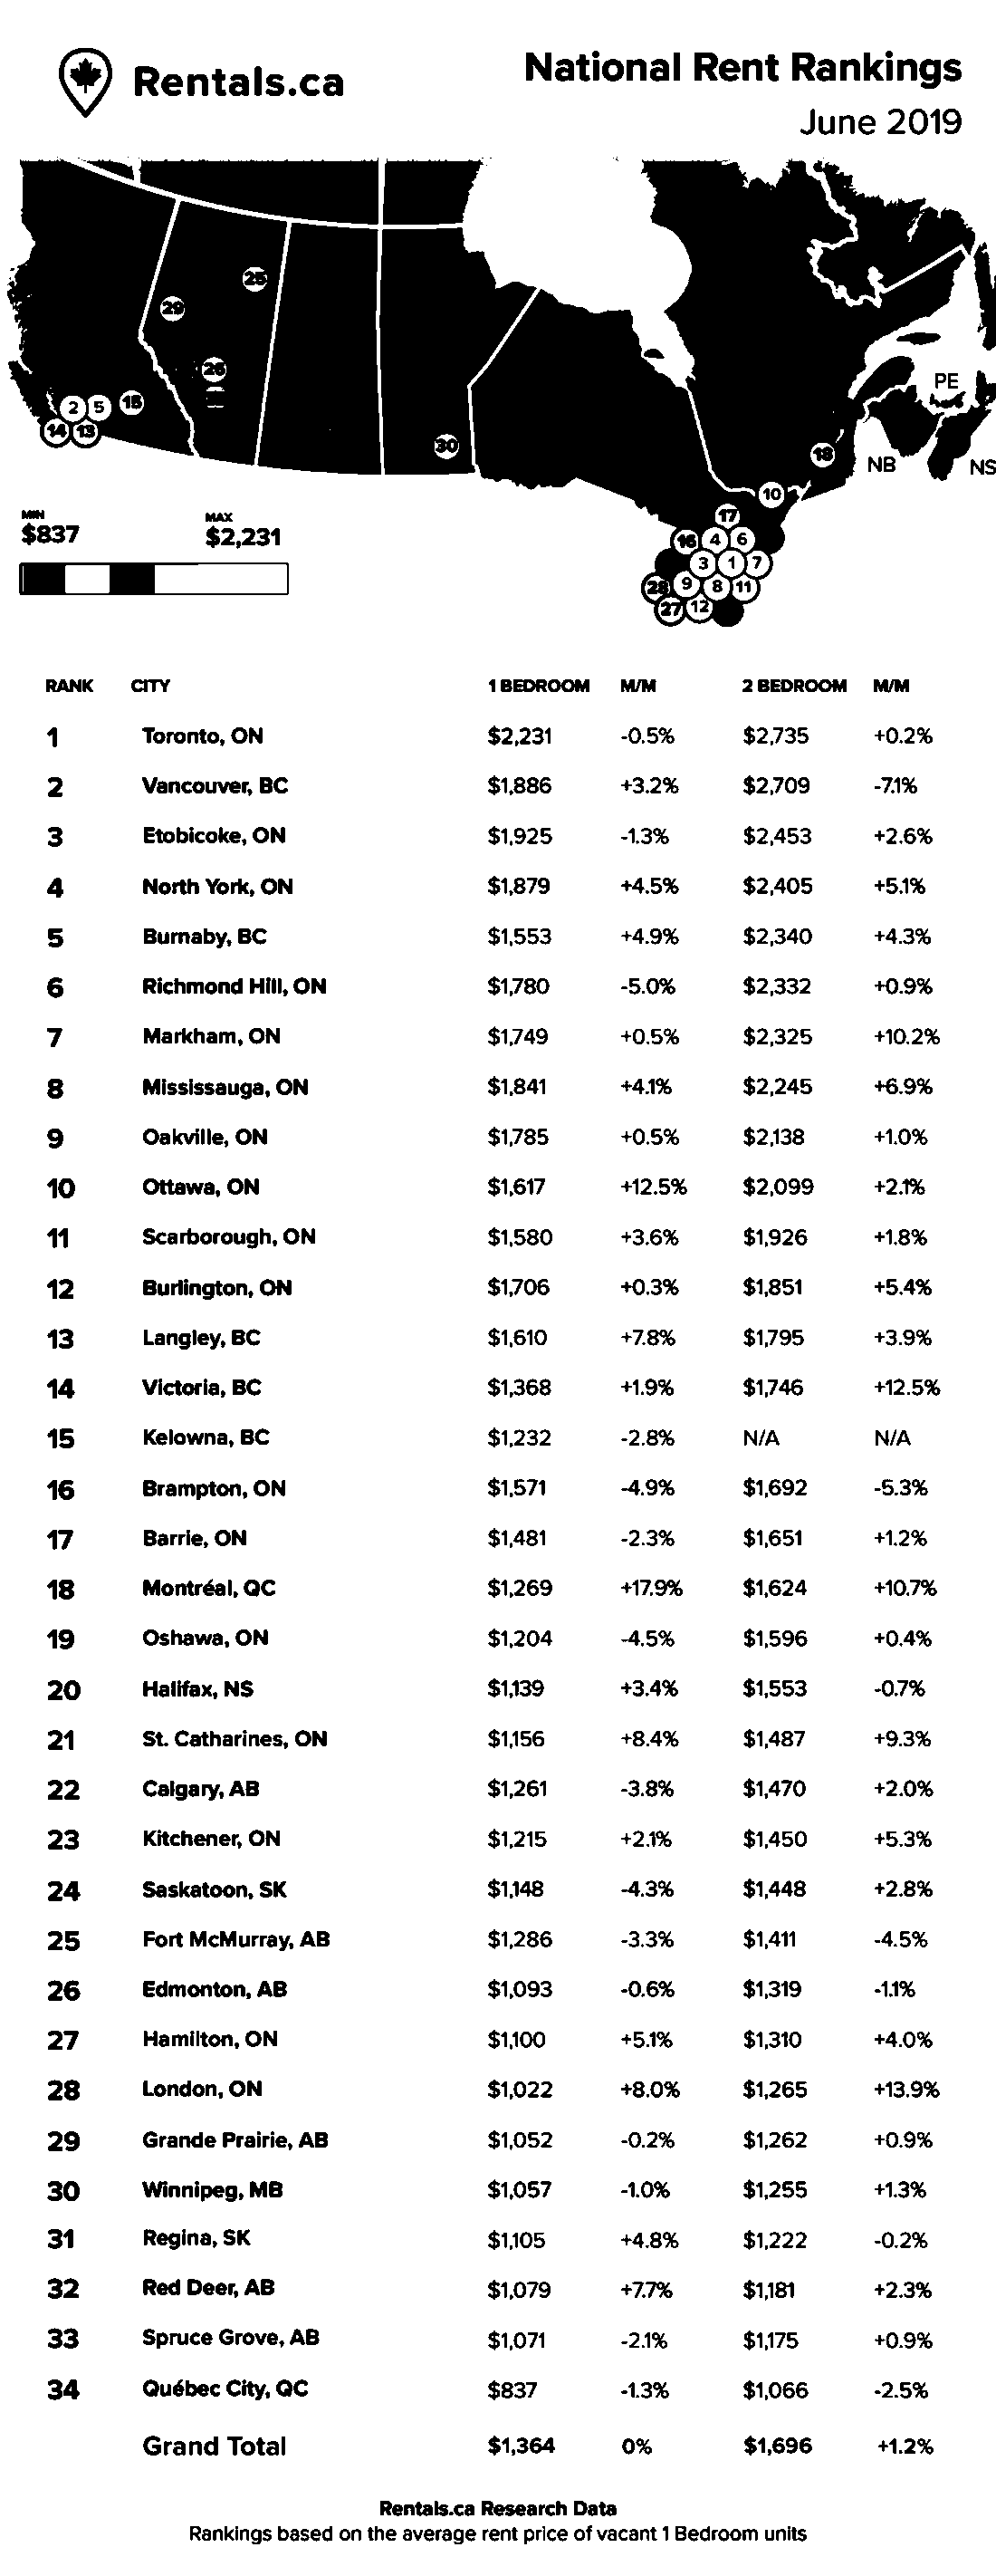

In [6]:
preprocessed_test_img_high_res = (preprocess(test_img_high_res,
                                  resize = 1100,
                                  grayscale = True,
                                  gaussian_blur = 0,
                                  thresholding = "binary",
                                  thresh_value = 160))
cv2_imshow(preprocessed_test_img_high_res)

In [11]:
print(pytesseract.image_to_string(preprocessed_test_img_high_res, lang = 'eng'))

® Rentals.ca National Rent Rankings
June 2019

 

 

RANK CITY 1BEDROOM M/M 2BEDROOM M/M
1 Toronto, ON $2,231 -0,5% $2,735 40.2%
2 Vancouver, BC $1,886 4+3.2% $2,709 -71%
3 Etobicoke, ON $1,925 ~1.3% $2,453 42.6%
4 North York, ON $1,879 44.5% $2,405 45.1%
5 Burnaby, BC $1,553 +4,.9% $2,340 44.3%
6 Richmond Hill, ON $1,780 -5.0% $2,332 40.9%
7 Markham, ON $1,749 +0.5% $2,325 +10.2%
8 Mississauga, ON $1,841 44.1% $2,245 46.9%
9 Oakville, ON $1,785 +0.5% $2138 41.0%
10 Ottawa, ON $1,617 +H12.5% $2,099 42.1%
"1 Scarborough, ON $1,580 +3.6% $1,926 41.8%
12 Burlington, ON $1,706 40.3% $1,851 45.4%
13 Langley, BC $1,610 +78% $1,795 43.9%
14 Victoria, BC $1,368 41.9% $1,746 +12.5%
45 Kelowna, BC $1,232 -2.8% N/A N/A
16 Brampton, ON $1,571 4.9% $1,692 6.3%
7 Barrie, ON $1,481 -2.3% $1,651 41.2%
18 Montréal, @C $1,269 +17,9% $1,624 0.7%
19 Oshawa, ON $1,204 45% $1,596 +0,4%
20 Halifax, NS $1,139 43.4% $1,553 0.7%
21 St. Catharines, ON $1,156 +8.4% $1,487 +9,3%
22 Calgary, AB $1,261 -3.8% $1,470 

In [14]:
# Getting OCR meta data with bounding boxes and confidences
results_test_img = pytesseract.image_to_data(preprocessed_test_img,
                                             lang = 'eng',
                                             output_type = pytesseract.Output.DICT)

In [253]:
coords = []
OCRtext = []
within_table = 0

for i in range(0, len(results_test_img["text"])):
  # Exrtract bounding box and coordinates of the text region from OCR result
  x = results_test_img["left"][i]
  y = results_test_img["top"][i]
  w = results_test_img["width"][i]
  h = results_test_img["height"][i]

  # Extract OCR text and confidence for thresholding
  text = results_test_img["text"][i]
  try:
    next_text = results_test_img["text"][i+1]
  except:
    pass
  conf = int(float(results_test_img["conf"][i]))

  # Initializing table on header first column 'rank'
  if "RANK" in text:
    within_table = 1

  # Ending table on 'grand total' or 'average'
  if ("grand" in text.lower()) and ("total" in next_text.lower()):
    within_table = 0

  if "average" in text.lower():
    within_table = 0

  if within_table:
    coords.append((x, y, w, h))
    OCRtext.append(text)

In [307]:
# Clustering on x coordinates to find columns

# Instancing x coordinates with y = 0 to cluster

xCoords = [(c[0], 0) for c in coords]

# Hierarchical agglomerative clustering to the coordinates
clustering = AgglomerativeClustering(n_clusters = None,
                                     affinity = "euclidean",
                                     linkage = "average",
                                     distance_threshold = 5)

clustering.fit(xCoords)

AgglomerativeClustering(distance_threshold=5, linkage='average',
                        n_clusters=None)

In [308]:
np.unique(clustering.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [309]:
sortedClusters = []

for label in np.unique(clustering.labels_):
  # Extract indices for the coordinates of current cluster
  idxs = np.where(clustering.labels_ == label)[0]

  # Condition acceptable cluster on mininmum size
  if (len(idxs) > 5) and (len(idxs) < 50):
    avg = np.average([coords[i][0] for i in idxs])
    sortedClusters.append((label, avg))

# Sorting clusters by their average x-coordinate
sortedClusters.sort(key = lambda x: x[1])
df = pd.DataFrame()

In [310]:
sortedClusters

[(17, 143.55555555555554),
 (1, 229.0),
 (12, 490.03846153846155),
 (9, 623.2692307692307),
 (6, 745.9615384615385),
 (7, 877.9130434782609)]

In [311]:
# Redefining test image as a colored OpenCV image
color_test_img = cv2.cvtColor(preprocessed_test_img, cv2.COLOR_GRAY2BGR)

for (label, _) in sortedClusters:
  # Extract indices for the coordinates of current cluster
  idxs = np.where(clustering.labels_ == label)[0]

  # Y coordinates from the elements in the current cluster
  # Sort them top-to-bottom
  yCoords = [coords[i][1] for i in idxs]
  sortedIdxs = idxs[np.argsort(yCoords)]

  # Generate a random color for the cluster
  color = np.random.randint(0, 255, size = (3,), dtype = "int")
  color = [int(c) for c in color]

  # Loop over the sorted indices
  for i in sortedIdxs:
    # Extract bounding box coordinates and draw bounding box for current element
    (x, y, w, h) = coords[i]
    cv2.rectangle(color_test_img, (x, y), (x + w, y + h), color, 2)
  
  # Extract OCR text for the current column, then populate dataframe
  cols = [OCRtext[i].strip() for i in sortedIdxs]
  currentDF = pd.DataFrame({cols[0]: cols[1:]})

  # Concatenate initialized dataframe with currentDF
  df = pd.concat([df, currentDF], axis = 1)

In [312]:
df.fillna("", inplace=True)
print(tabulate(df, headers="keys", tablefmt="psql"))

+----+--------------+-------+------------+------+------------+------+
|    | Toronto,     | ON    | 1BEDROOM   | MM   | 2BEDROOM   | MM   |
|----+--------------+-------+------------+------+------------+------|
|  0 | Missiasauge, | ON    | $2,135     | -    | $2,577     | “3%  |
|  1 | Vancouver,   | AB    | $1,825     | -2%  | $2.21      | “1%  |
|  2 | Ottawa,      | GC    | $1,768     | 8%   | $2,541     | -3%  |
|  3 | York,        | ON    | $1,608     | +5%  | $1,959     | “3%  |
|  4 | Brampton,    | City, | $1,570     | +1%  | $2,214     | “2%  |
|  5 | Oshawa,      |       | $1,514     | 3%   | $1.681     | -5%  |
|  6 | Scarborough, |       | $1397      | -    | $1,464     | +2%  |
|  7 | Calgary,     |       | $1313      | -2%  | $1727      | -%   |
|  8 | Fort         |       | $1,270     | +4%  | $1448      | 5%   |
|  9 | Hamilton,    |       | $1236      | +2%  | $1,345     | +1%  |
| 10 | Kitchener,   |       | $1163      | -%   | $1,329     | 4%   |
| 11 | Halifax,     

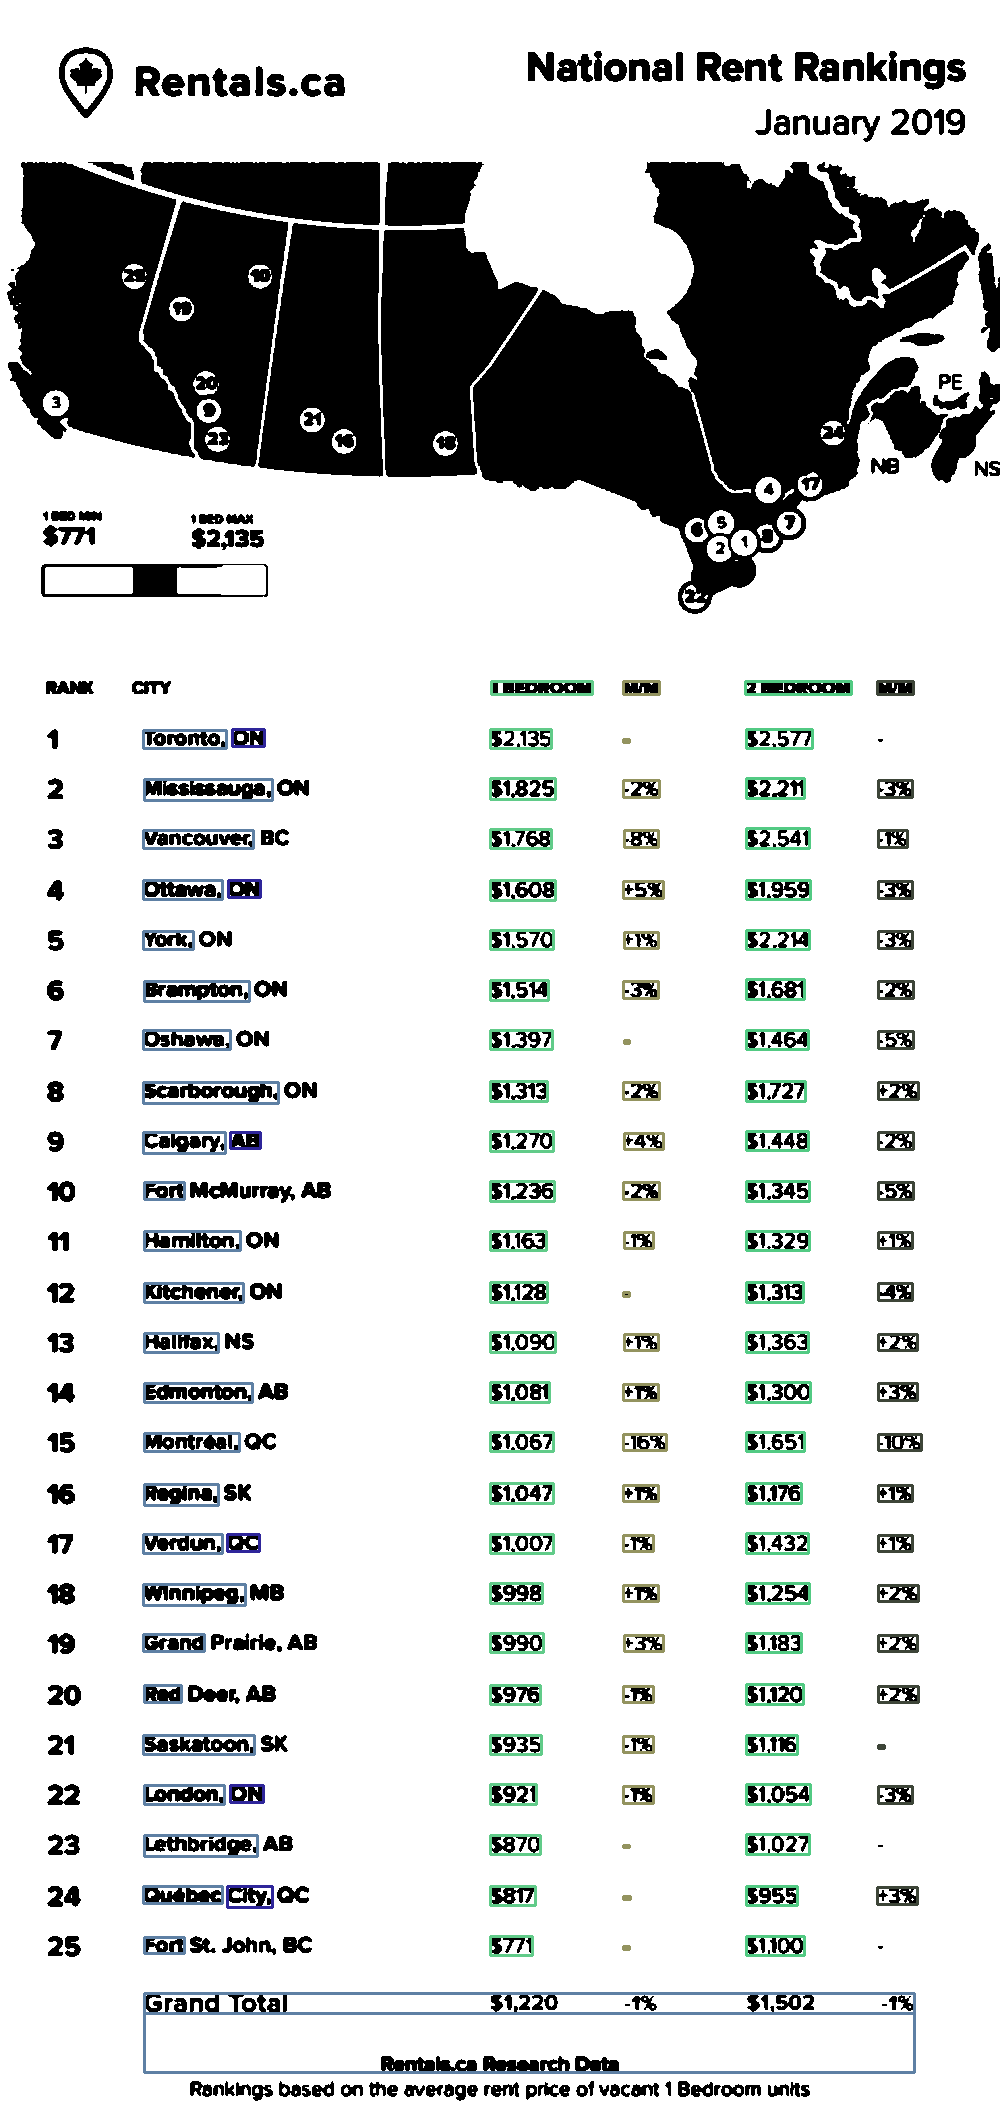

In [313]:
cv2_imshow(color_test_img)